In [2]:
!pip install -q -U transformers==4.37.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 87.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.37.0 which is incompatible.


In [8]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained("visheratin/MC-LLaVA-3b", torch_dtype=torch.float16, trust_remote_code=True).to("cuda")

No module named 'flash_attn'


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("visheratin/MC-LLaVA-3b", trust_remote_code=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


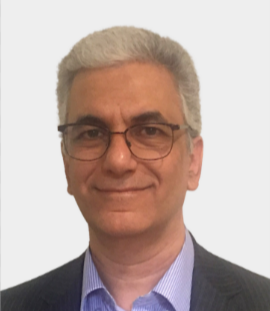

In [10]:
from PIL import Image

try:
  raw_image = Image.open("sample.png").convert("RGB")
  display(raw_image)
except FileNotFoundError:
  print("sample.png not found")

In [11]:
prompt = """<|im_start|>user
<image>
What is this man's profession?<|im_end|>
<|im_start|>assistant
"""

with torch.inference_mode():
    inputs = processor(prompt, [raw_image], model, max_crops=100, num_tokens=728)
    output = model.generate(**inputs, max_new_tokens=200, use_cache=True, do_sample=False,
        eos_token_id=processor.tokenizer.eos_token_id, pad_token_id=processor.tokenizer.eos_token_id)

result = processor.tokenizer.decode(output[0]).replace(prompt, "").replace("<|im_end|>", "")
print(result)

It is not possible to know for sure what the man's profession is from the image. However, he is wearing a suit and tie, which suggests that he may be a businessman or a professional in a formal setting.


In [21]:
model.vision_model

SiglipVisionEncoder(
  (vision_tower): SiglipVisionModel(
    (vision_model): SiglipVisionTransformer(
      (embeddings): SiglipVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(729, 1152)
      )
      (encoder): SiglipEncoder(
        (layers): ModuleList(
          (0-26): 27 x SiglipEncoderLayer(
            (self_attn): SiglipAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): SiglipMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_features=1152, out_feature

# Q-Former

In [22]:
!pip install qformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
from qformer import QFormer

import torch
x = torch.randn(1, 32, 512)

# Create a random image tensor of shape (1, 3, 224, 224)
img = torch.randn(1, 3, 224, 224)

# Create an instance of the QFormer model with the following parameters:
# - input_size: 512
# - num_heads: 8
# - num_layers: 8
# - dropout: 0.1
# - num_classes: 2
# - num_patches: 2
qformer = QFormer(512, 8, 8, 0.1, 2, 2)

# Apply the QFormer model to the input tensors x and img
y = qformer(x, img)

In [6]:
qformer

QFormer(
  (img_block): ImgBlock(
    (attn): MultiQueryAttention(
      (Wqkv): Linear(in_features=512, out_features=640, bias=True)
      (out_proj): Linear(in_features=512, out_features=512, bias=True)
    )
    (cross_attn): CrossAttention(
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (norm_context): Identity()
      (dropout): Dropout(p=0.1, inplace=False)
      (to_q): Linear(in_features=512, out_features=512, bias=False)
      (to_kv): Linear(in_features=512, out_features=1024, bias=False)
      (to_out): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=False)
        (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
    )
    (self_attn_layers): ModuleList(
      (0-7): 8 x MultiQueryAttention(
        (Wqkv): Linear(in_features=512, out_features=640, bias=True)
        (out_proj): Linear(in_features=512, out_features=512, bias=True)
      )
    )
    (cross_attn_layers): ModuleList(
      (0-7): 8 x CrossAtte